### 21 Time Series - Website Traffic Forecasting 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df= pd.read_csv("Thecleverprogrammer.csv")


In [3]:
df.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [4]:
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')


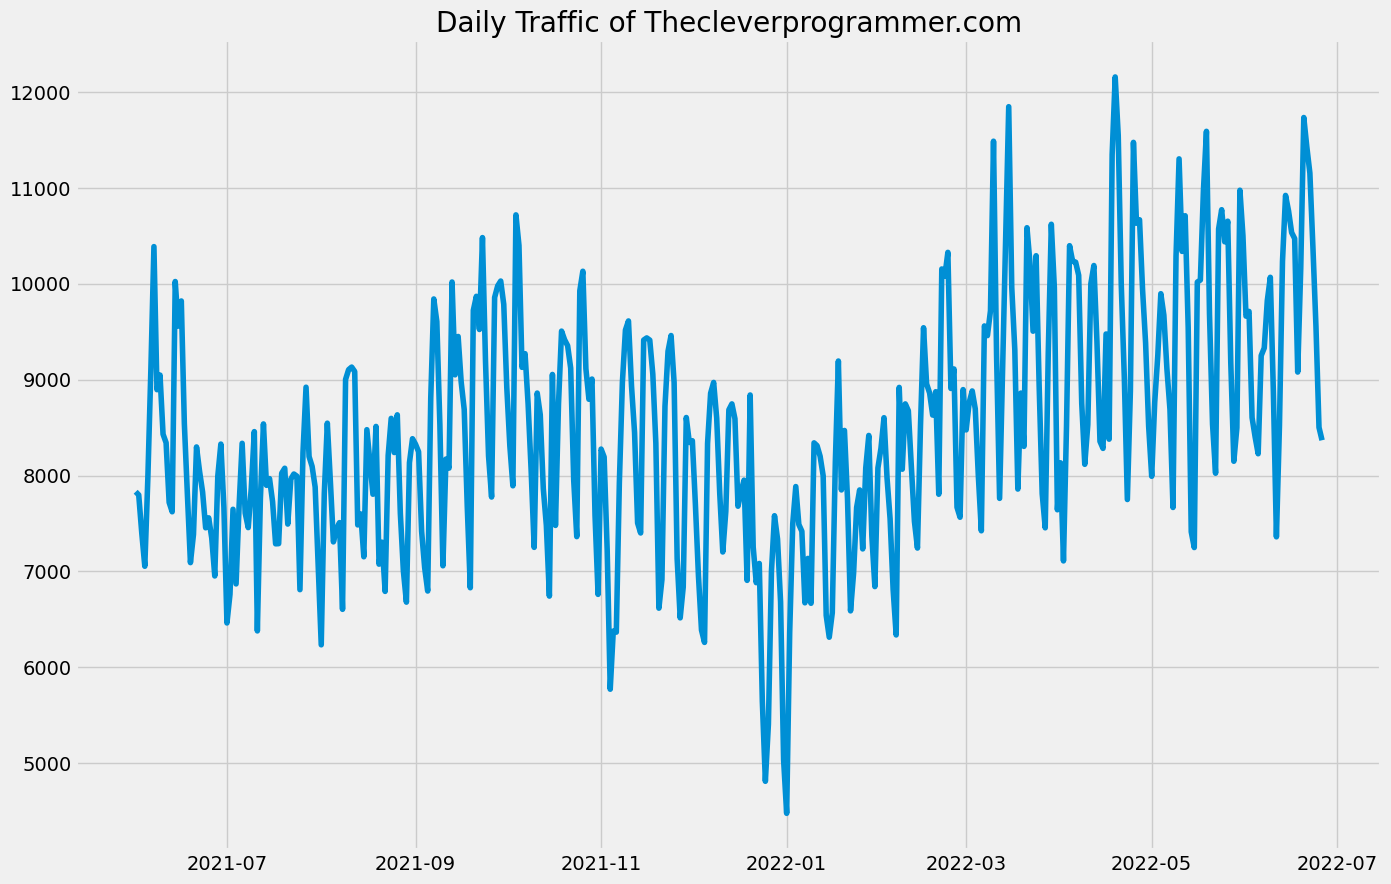

In [5]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(df["Date"], df["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

In [11]:
df = df.rename(columns={'Date': 'ds', 'Views': 'y'})


In [12]:
df.head()

,ds,y
0,2021-06-01,7831
1,2021-06-02,7798
2,2021-06-03,7401
3,2021-06-04,7054
4,2021-06-05,7973


In [13]:
from prophet import Prophet

In [14]:
pr=Prophet()

In [15]:
model=pr.fit(df)

18:56:26 - cmdstanpy - INFO - Chain [1] start processing
18:56:26 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = model.make_future_dataframe(periods=365)  # predict for 1 year into the future


In [17]:
forecast = model.predict(future)


C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


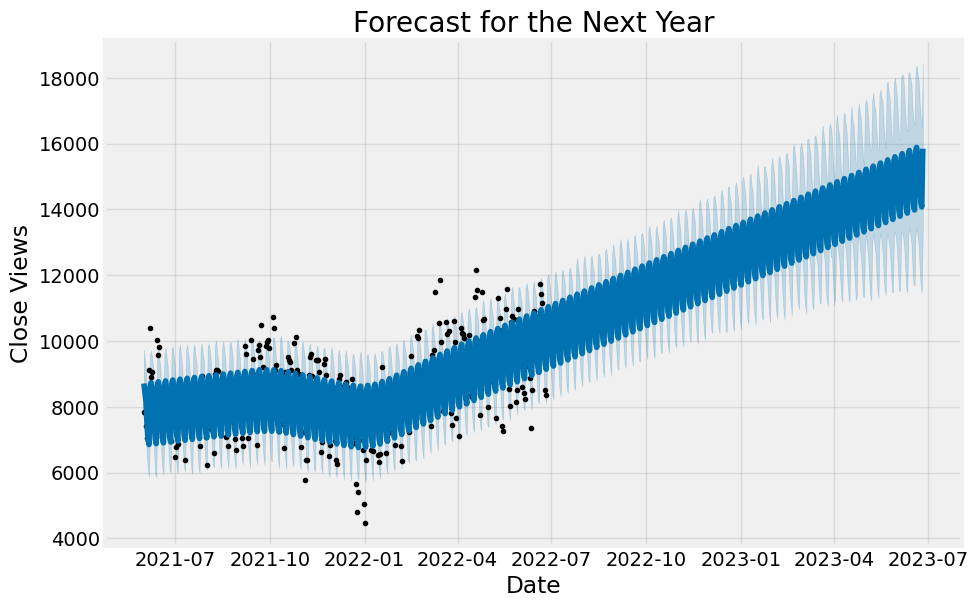

In [20]:
fig1 = model.plot(forecast)
plt.title('Forecast for the Next Year')
plt.xlabel('Date')
plt.ylabel('Close Views')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


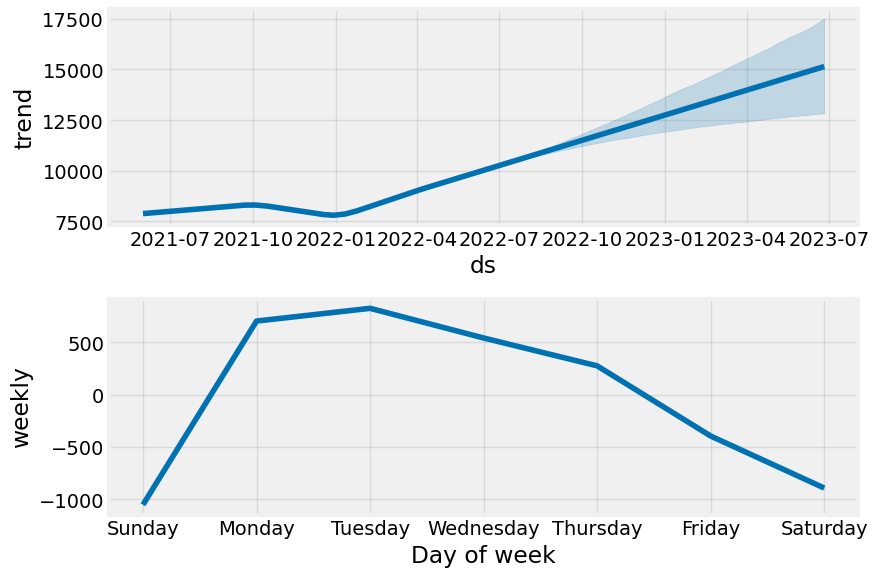

In [19]:
# Step 7: Plot forecast components
fig2 = model.plot_components(forecast)
plt.show()
